# Dogs Vs Cats Classification Problem 📷 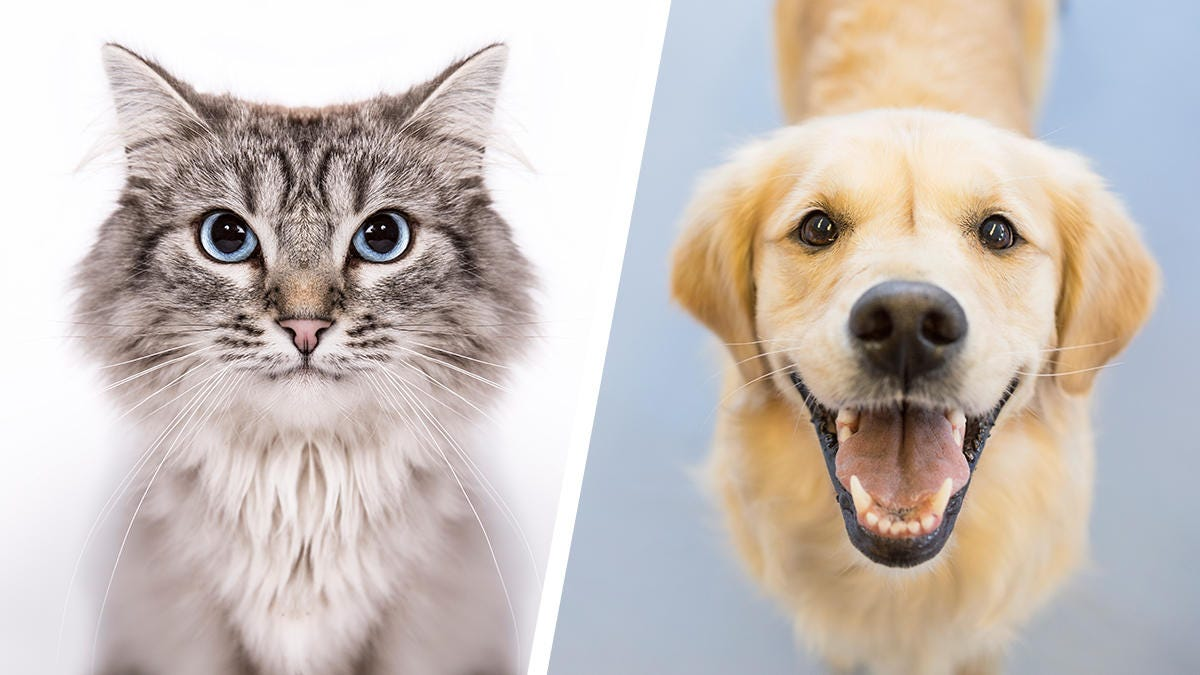
The Dogs & Cats is a foundational problem for a basic CNN(convolutional neural network) model which involves classifying images as a dog or a cat.The dataset can be used for learning how to develop,evaluate and use convolutional deep learning neural networks for classification of images. This includes how to develop a robust test harness for estimating the performance of the model, exploring improvements for the model by changing the paramters of the model, saving and loading the model to make predicitions on new data.

# Table of Content
1.   Introduction
1.   Data Description
1.  Loading Libraries📖
1.   Data Extraction📁
1.   Data Exploration📊
1.   Train Test Split
2.   Using Dataframe
2.   Data Preparation 🛠️
2.   Image Data Generator
2.   Using DataFrame
1.   Deep learning Model ⚙️
2.   Model Layers
1.   Callbacks
1.   Compile Model
2.   Fit Model
2.   Plot Result
1.   Evaluvation
2.   Prediction
1.   Visualize Classified Images
2.   Submission
1.   Conclusion































# Introduction 💥
**In this article, we will discover how to develop a CNN to classify images of dogs and cats.**

After reading this article, you will know :
*   How to load and prepare the images for training purpose.
*  How to split data for training and validation purpose.
*   How to apply Data Augmentation to the data.
*   How to develop a CNN model using keras and how to choose various parameters for improving performance of the model.
*   How to evaluate performance of our model.
*   How to save and load a model for further predictions.
*   How to draw the confusion matrix for trained model.





# Data Description
The training archive contains **25,000 images** of dogs and cats.

Train your algorithm on these files and predict the labels for test1.zip.
*   1 = dog
*   0 = cat



# Loading Libraries


In [ ]:
# Basic
import zipfile
import glob
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

#Data Extraction
* Extract data files
* Data Visualization

{"username":"kariimreda","key":"1cc88c3672b454f6411085e08ec7e32a"}

In [ ]:
!pip install opendatasets
import opendatasets as od



od.download('https://www.kaggle.com/competitions/dogs-vs-cats/data/dogs-vs-cats')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kariimreda
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:41<00:00, 20.8MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
train_path = "/content/dogs-vs-cats/train.zip"
test_path = "/content/dogs-vs-cats/test1.zip"

# Specify the path to the zip file
# Open the zip file
with zipfile.ZipFile(train_path, 'r') as zipp:
      # Extract all the files to a specific directory (e.g., "/content/data/train")
    zipp.extractall("/content/train")

with zipfile.ZipFile(test_path, 'r') as zipp:
  # Extract all the files to a specific directory (e.g., "/content/data/test")
    zipp.extractall("/content/test")

In [ ]:
image_dir = "/content/train/train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.8931.jpg,cat
1,cat.4358.jpg,cat
2,dog.8789.jpg,dog
3,dog.9715.jpg,dog
4,cat.1421.jpg,cat


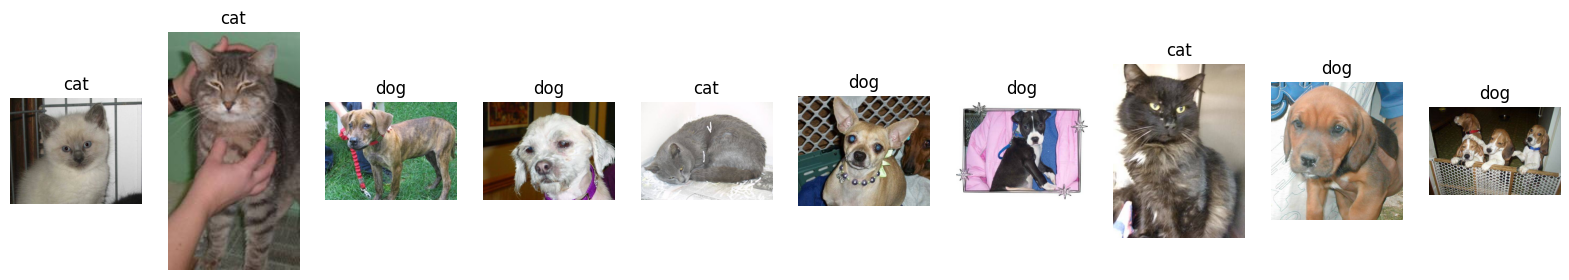

In [ ]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    plt.subplot(1, 10, i + 1)
    filename = os.path.join(image_dir, data.filename[i])  # Full path to the image file
    image = imread(filename)
    plt.imshow(image)
    plt.title(data.label[i], fontsize=12)
    plt.axis('off')

plt.show()

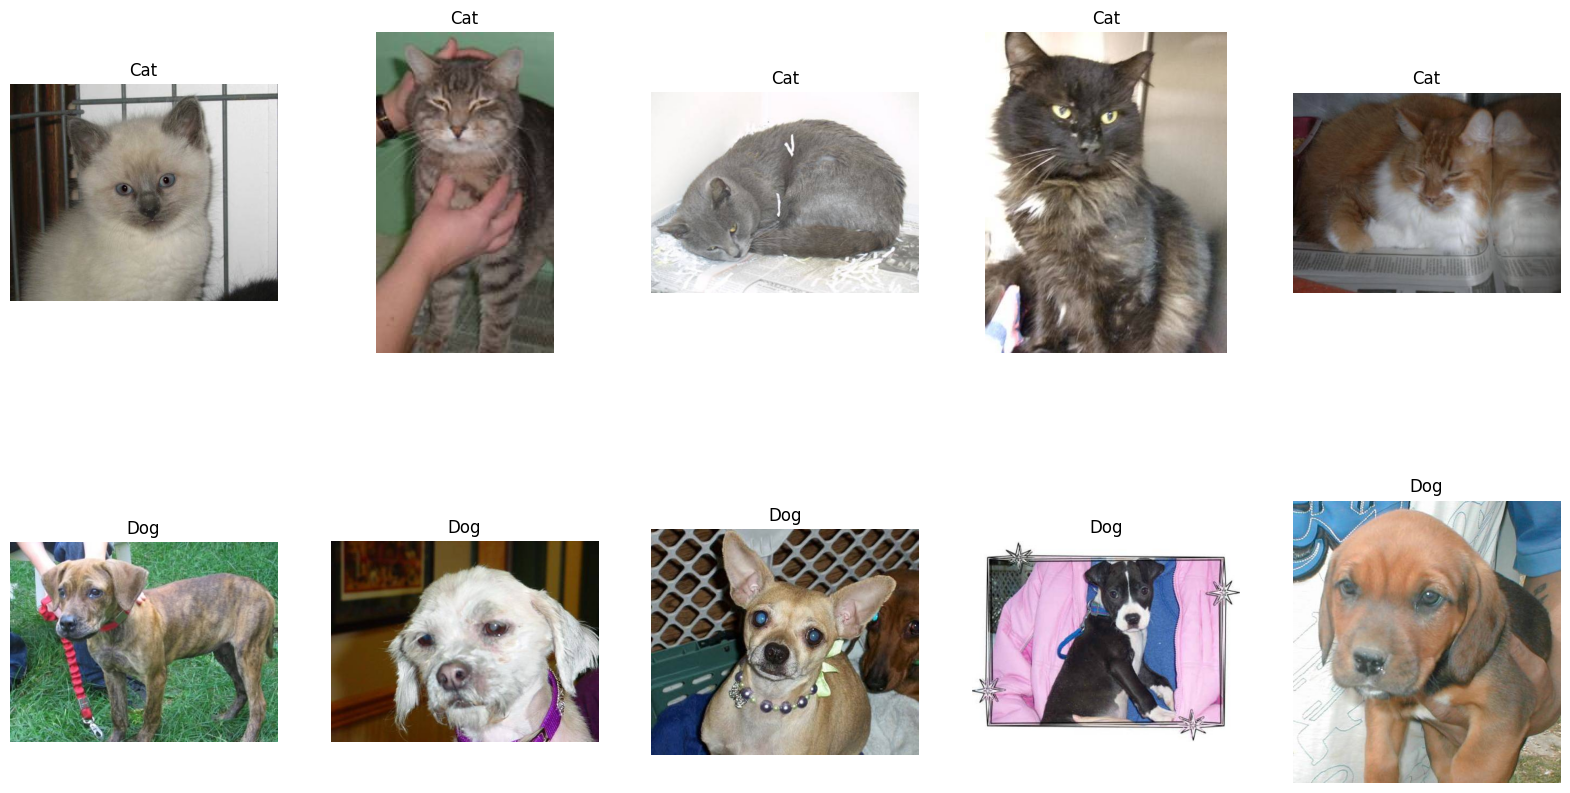

In [ ]:

# Filter the dataframe for cat images
cat_data = data[data['label'] == 'cat']

# Filter the dataframe for dog images
dog_data = data[data['label'] == 'dog']

plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Plot cat images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    filename = os.path.join(image_dir, cat_data.filename.iloc[i])
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat', fontsize=12)
    plt.axis('off')

# Plot dog images
for i in range(5):
    plt.subplot(2, 5, i + 6)
    filename = os.path.join(image_dir, dog_data.filename.iloc[i])
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog', fontsize=12)
    plt.axis('off')

plt.show()

In [ ]:
# train test split using dataframe

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


## Data Preparation
firstly, we will list out all the important parameters and respective values.

In [ ]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

# Image Data Generator
* Data Augmentation
* The data for will used by flow_from_dataframe.
* The batch size is 32 and the image size is (128,128).

In [ ]:
train_data_generator = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=15,      # Rotate images randomly within the range of 20 degrees
    width_shift_range=0.2,  # Shift the width of images randomly by 20%
    height_shift_range=0.2, # Shift the height of images randomly by 20%
    shear_range=0.2,    # Apply random shear transformations
    zoom_range=0.1,     # Apply random zoom transformations
    horizontal_flip=True  # Flip images horizontally
)

test_data_generator = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale pixel values for test data

In [ ]:
# Applying image data gernerator to train and test data

train_generator = train_data_generator.flow_from_dataframe(X_train,
                                                    directory = image_dir,
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size),
                                                   )
val_generator = test_data_generator.flow_from_dataframe(X_val,
                                                 directory = image_dir,
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False,
                                                )

test_generator = test_data_generator.flow_from_dataframe(X_test,
                                                  directory = image_dir,
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False,
                                                  )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


# Deep Learning Model
### Model layers

**Architecture**
The architecture of the Cat vs Dog Image Classification model consists of the following Layers and components:

**Layers :**

1. The input layer consist of a Conv2D with 32 filters and activation relu.
2. The model contain the 3 blocks of convolution with increasing filters and activation relu.
3. Each convolution block contains Batch Noramlization, Max pooling (pool_size = 2) and Dropout (0.2).
4. The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
5. The output layer is a Dense layer with 2 units and softmax activation.
**Components:**
1. Input Layer: Receives input images for classification.
2. Convolutional Layers: Extract features from the images through convolutional operations.
3. Pooling Layers: Reduce the spatial dimensions of the feature maps.
4. Flatten Layer: Convert the 2D feature maps into a 1D vector.
5. Fully Connected Layers: Perform classification using densely connected layers.
6. Output Layer: Provides the final prediction probabilities for cat and dog classes.

In [ ]:
model = Sequential()

# Encoder or Features Extractions

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Decision Block

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_11 (Ba  (None, 61, 61, 64)       

# Callbacks
we will be using two callbacks -
1. ReduceLROnPlateau : Reduce learning rate when a metric has stopped improving.
2. EarlyStopping : Stop training when a monitored metric has stopped improving.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.25,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

# Compile the model
Finally we will compile the model .There are 3 things to mention here : Optimizer,Loss, Metrics
* Optimizer :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.​
* Loss :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.​
* Metrics :- This is to denote the measure of your model. Can be accuracy or some other metric.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fit the model
We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 30 epochs.




In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                   )

Epoch 1/30
625/625 [==============================] - 128s 205ms/step - loss: 0.1899 - accuracy: 0.9223 - val_loss: 0.1387 - val_accuracy: 0.9448 - lr: 1.0000e-05
Epoch 2/30
625/625 [==============================] - 129s 206ms/step - loss: 0.1952 - accuracy: 0.9200 - val_loss: 0.1428 - val_accuracy: 0.9420 - lr: 1.0000e-05
Epoch 3/30
625/625 [==============================] - 128s 204ms/step - loss: 0.1939 - accuracy: 0.9209 - val_loss: 0.1404 - val_accuracy: 0.9448 - lr: 1.0000e-05
Epoch 4/30
625/625 [==============================] - 132s 211ms/step - loss: 0.1937 - accuracy: 0.9203 - val_loss: 0.1421 - val_accuracy: 0.9432 - lr: 1.0000e-05


# Plot the results

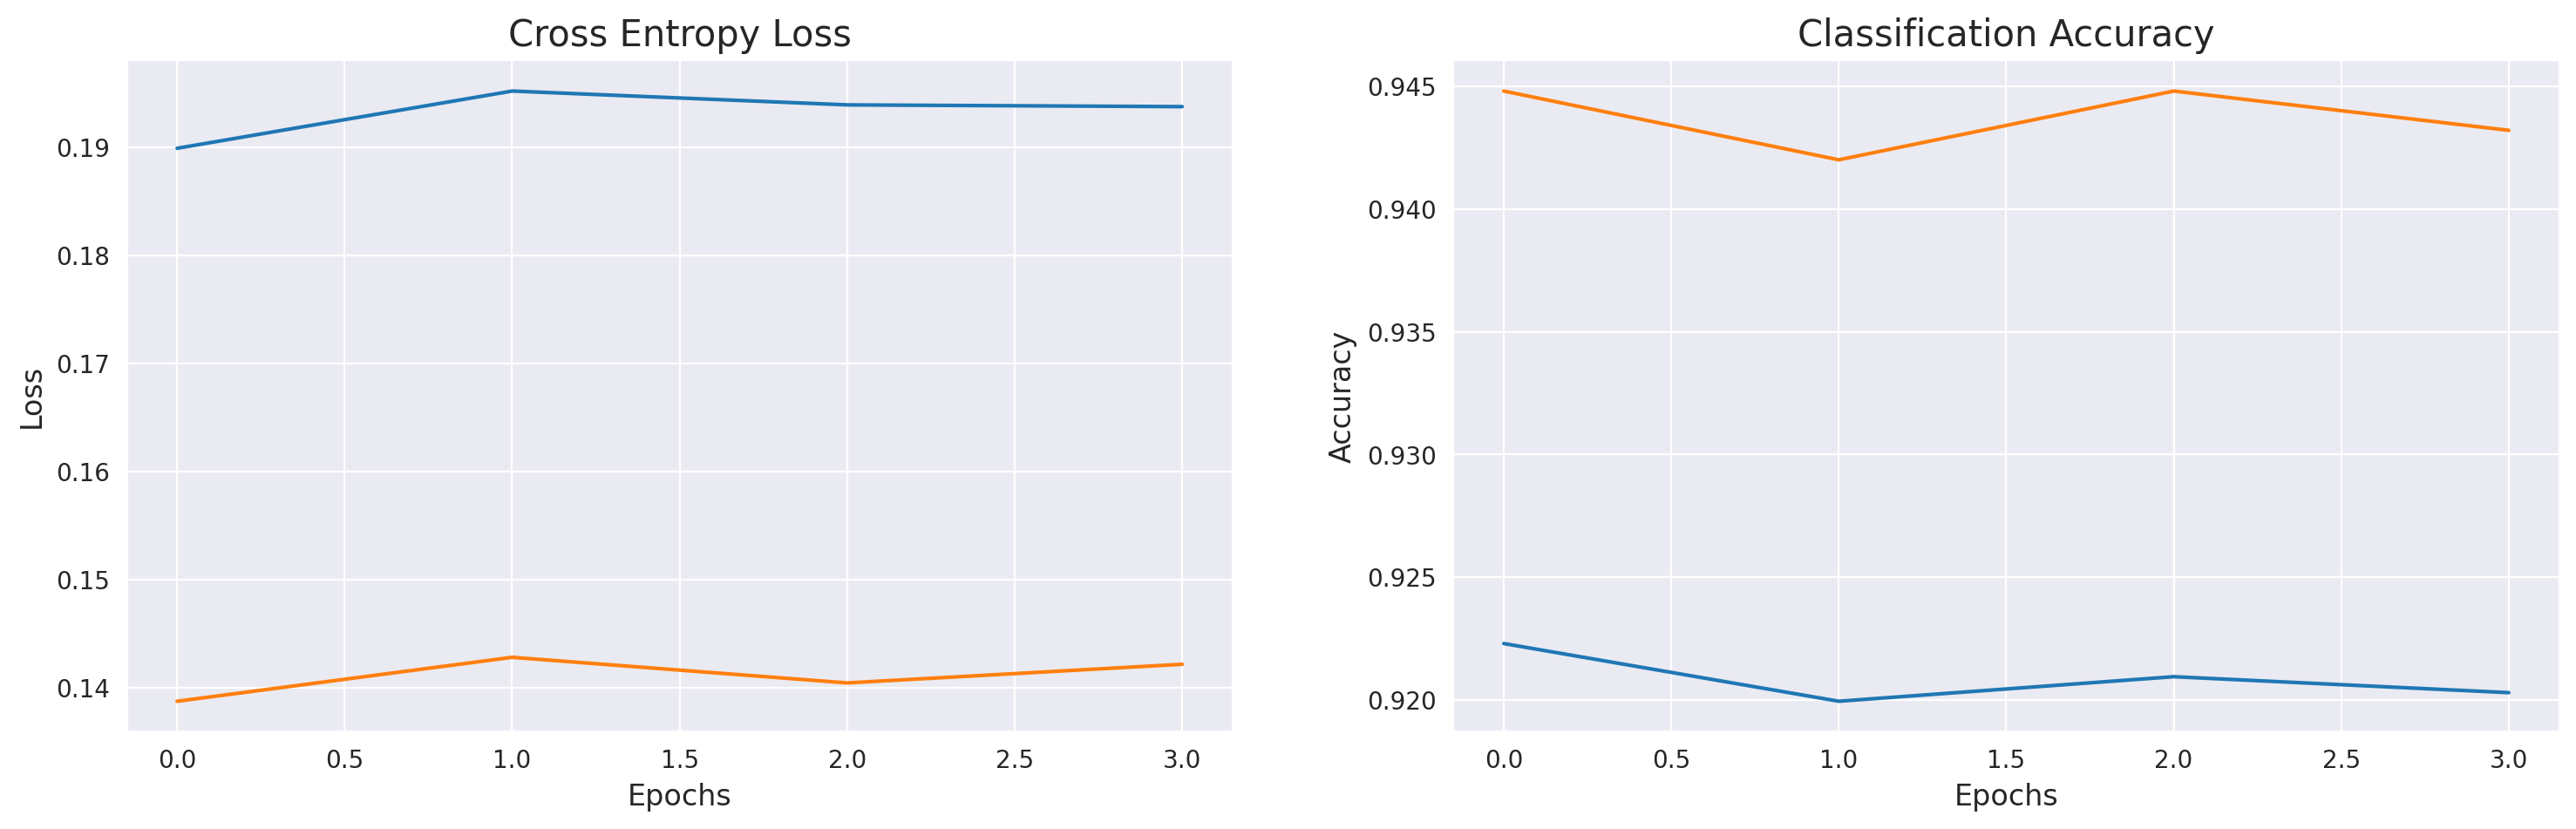

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

# Evaluvate
we will evaluvate the Training and validation data accuracy and loss.

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 93.69000196456909
The Loss of the model for training data is: 0.1523909717798233
The accuracy of the model for validation data is: 94.48000192642212
The Loss of the model for validation data is: 0.1387147754430771


Finally, we will save the model for future use.


In [ ]:
# Save the Model
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction
Now, we will predict the model on test dataset.

In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 93.91999840736389
The Loss of the model for testing data is: 0.15369336307048798


In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.92      0.96      0.94      1250
         Dog       0.96      0.92      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



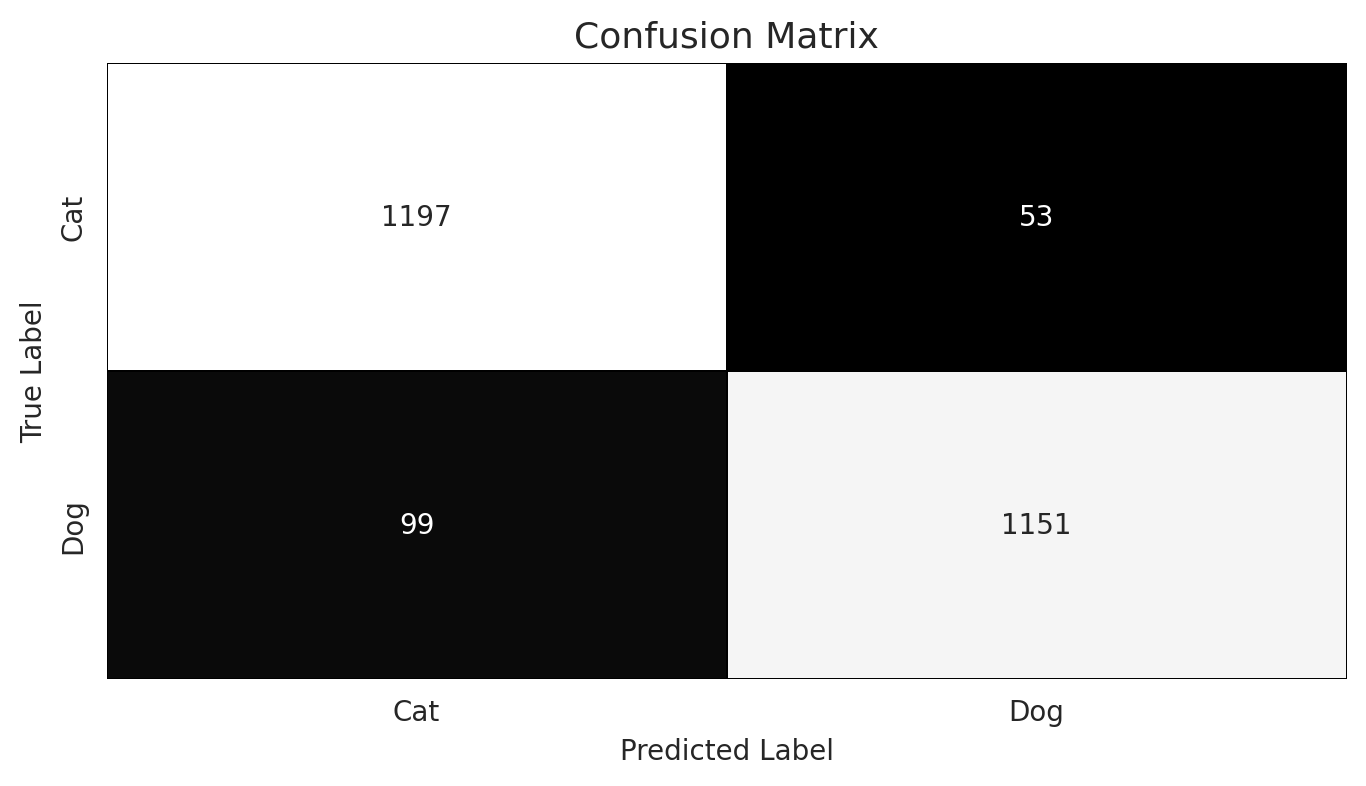

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

submission
Make predictions on test data for submission.

In [ ]:
size =(128,128)

# loading into dataframe
test_dir = "/content/test/test1"
filenames = os.listdir(test_dir)
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'

# Create data genenerator for test data
test1_idg =  test_data_generator.flow_from_dataframe(test_data,
                                     "/content/test/test1",
                                     x_col= "filename",
                                     y_col = 'label',
                                     batch_size = bat_size,
                                     target_size=size,
                                     shuffle = False)

# Test Prediction
test1_predict = model.predict(test1_idg,verbose = 0)

test1_predict_argmax = np.argmax(test1_predict, axis=1)

y_test_pred = test1_predict_argmax

test_data['label'] = y_test_pred

# mapping
label_mapping = {0: 'cat', 1: 'dog'}
test_data['label'] = test_data['label'].map(label_mapping)
test_data.head()

# csv file output for submission
sub = pd.read_csv('/content/dogs-vs-cats/sampleSubmission.csv',index_col='id')

sub['label'] = y_test_pred

sub.to_csv('submission.csv',index=True)

Found 12500 validated image filenames belonging to 1 classes.


Visualize Classified Images


In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx in range(10):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()

# Conclusion
We successfully built a deep neural network model by implementing Convolutional Neural Network (CNN) to classify dog and cat images.

The model was used to predict the classes of the images from the independent test set and results were submitted to test the accuracy of the prediction with fresh data.

The Cat vs Dog Image Classification model demonstrates the successful implementation of a Convolutional Neural Network for image classification tasks. By accurately distinguishing between images of cats and dogs, this project showcases the potential of deep learning algorithms in solving real-world problems involving image analysis. Through this project, we aim to inspire further exploration of CNNs and their applications in various domains,